In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog

In [3]:
os.getcwd()

'/home/mayank_khulbe_farmart_co/fmt/document-alignment-detection/document_alignment_correction'

In [4]:
img = io.imread("data/original_images/train/ffcn0226_16.png")
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

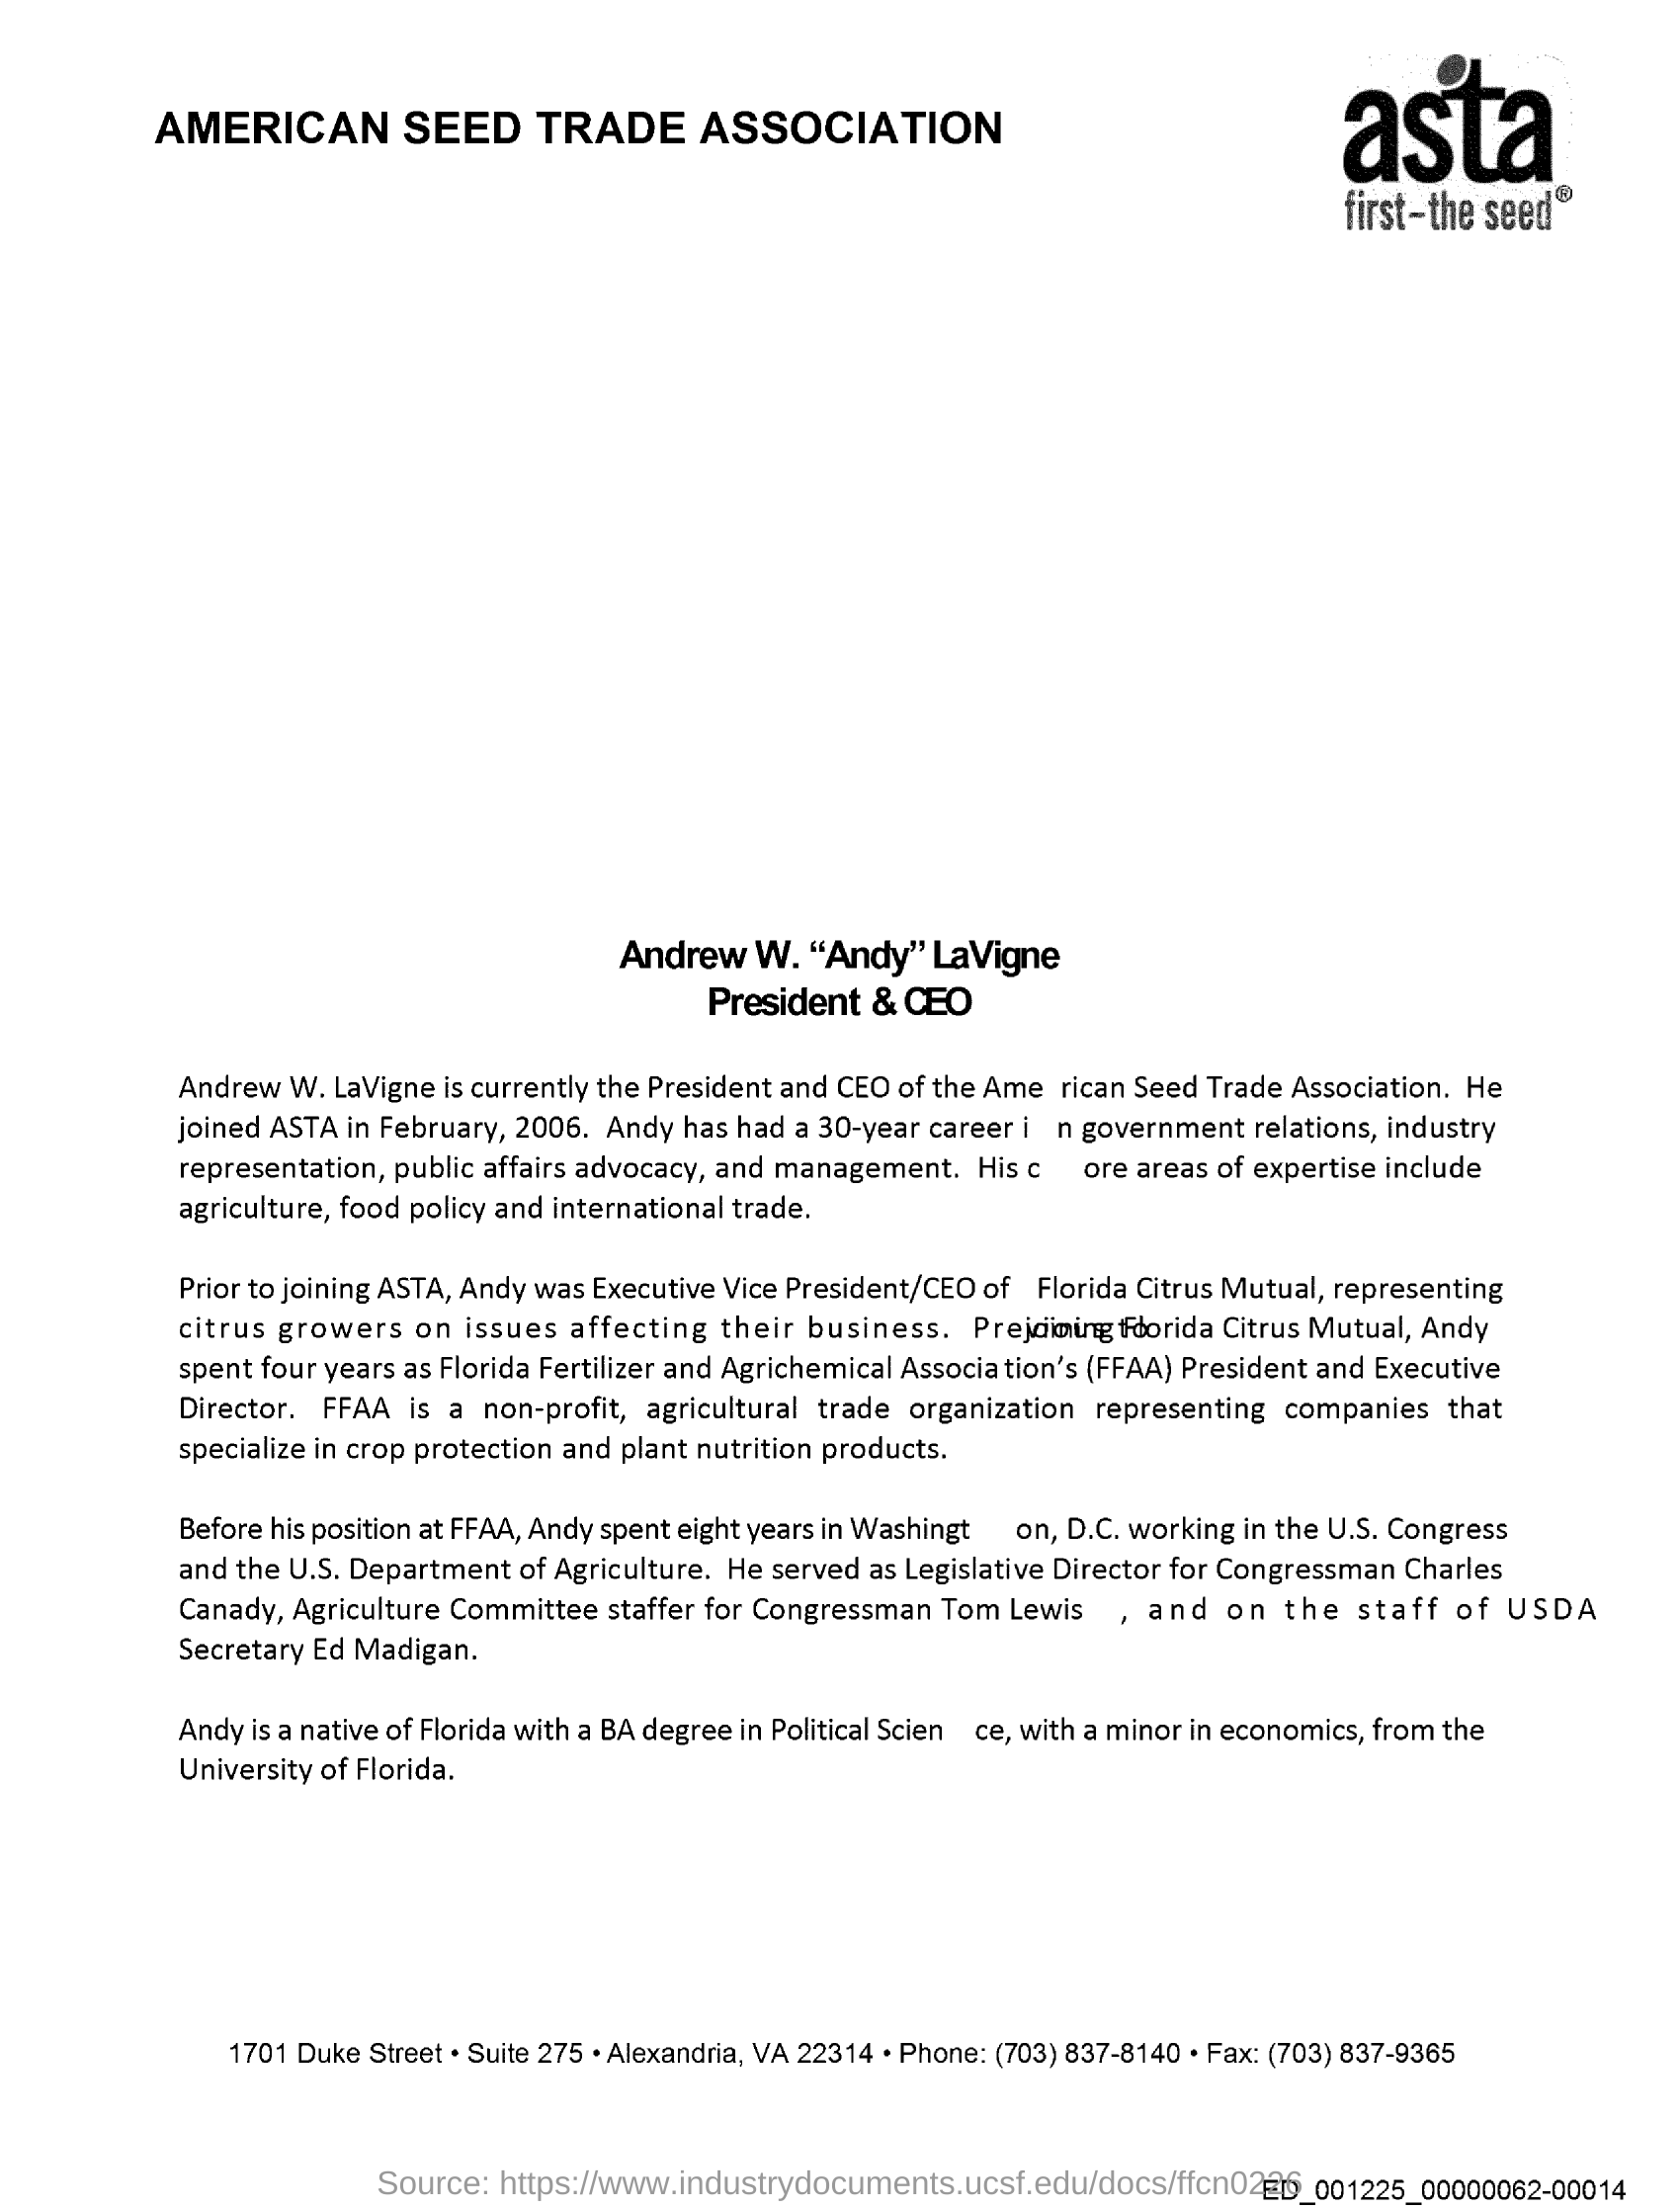

In [12]:
from PIL import Image

image = Image.open("data/original_images/train/ffcn0226_16.png")
image

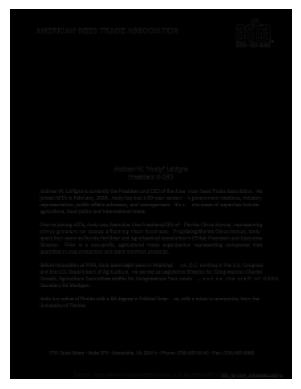

In [15]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [17]:
# io.imsave(hog_image, "hog_image.png")

AttributeError: 'str' object has no attribute 'dtype'

In [5]:
mag = []
theta = []
for i in range(128):
  magnitudeArray = []
  angleArray = []
  for j in range(64):
    # Condition for axis 0
    if j-1 <= 0 or j+1 >= 64:
      if j-1 <= 0:
        # Condition if first element
        Gx = img[i][j+1] - 0
      elif j + 1 >= len(img[0]):
        Gx = 0 - img[i][j-1]
    # Condition for first element
    else:
      Gx = img[i][j+1] - img[i][j-1]
    
    # Condition for axis 1
    if i-1 <= 0 or i+1 >= 128:
      if i-1 <= 0:
        Gy = 0 - img[i+1][j]
      elif i +1 >= 128:
        Gy = img[i-1][j] - 0
    else:
      Gy = img[i-1][j] - img[i+1][j]

    # Calculating magnitude
    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
    magnitudeArray.append(round(magnitude, 9))

    # Calculating angle
    if Gx == 0:
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy / Gx)))
    angleArray.append(round(angle, 9))
  mag.append(magnitudeArray)
  theta.append(angleArray)

In [7]:
mag = np.array(mag)
theta = np.array(theta)

In [13]:
np.unique(theta)

array([ 0., 45.])

In [19]:
len(theta)

128

In [1]:
import os
os.chdir("/home/mayank_khulbe_farmart_co/fmt/document-alignment-detection")

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from document_alignment_correction.helper import rotateImage

In [3]:
image = io.imread("document_alignment_correction/data/original_images/prediction/sik79d00.png")
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [4]:
image.shape

(3247, 2544, 3)

In [5]:
_, rotated = rotateImage(image, -123)
rotated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)